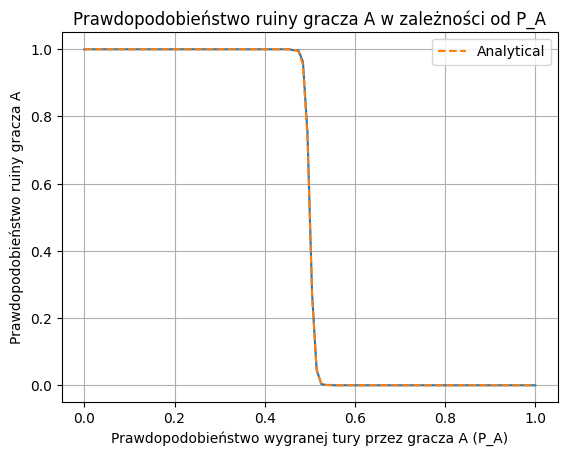

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

class RuinsParam(object):
    """
    A - Gracz A
    B - Gracz B
    a - kapitał gracza A
    b - kapitał gracza B
    pA - prawdopodobieństwo wygranej tury przez gracza A
    pB - prawdopodobieństwo wygranej tury przez gracza B
    qA - prawdopodobieństwo przegranej tury przez gracza A
    qB - prawdopodobieństwo przegranej tury przez gracza B
    """
    def __init__(self, A, B, a, b, pA, pB, qA, qB):
        self.A = A
        self.B = B
        self.a = a
        self.b = b
        self.pA = pA
        self.pB = pB
        self.qA = qA
        self.qB = qB
        

class GameA(RuinsParam):
    def simulate(self, num_simulations=1000):
        ruins = 0
        for _ in range(num_simulations):
            a, b = self.a, self.b
            while a > 0 and b > 0:
                if np.random.rand() < self.pA:
                    b -= 1
                    a += 1
                else:
                    a -= 1
                    b += 1
            if a == 0:
                ruins += 1
        return ruins / num_simulations

A = "Gracz A"
B = "Gracz B"
a = 50
b = 50
pA_values = np.linspace(0, 1, 100)
pB = 1 - pA_values
qA = 1 - pA_values
qB = pA_values

# Symulacja
prob_ruin_A = []
for pA in pA_values:
    game = GameA(A, B, a, b, pA, 1-pA, 1-pA, pA)
    prob_ruin_A.append(game.simulate())

plt.plot(pA_values, prob_ruin_A)
plt.xlabel('Prawdopodobieństwo wygranej tury przez gracza A (P_A)')
plt.ylabel('Prawdopodobieństwo ruiny gracza A')
plt.title('Prawdopodobieństwo ruiny gracza A w zależności od P_A')
def analytical_ruin_probability(a, b, pA):
    if pA == 0.5:
        return b / (a + b)
    elif pA == 1:
        return 0
    elif pA == 0:
        return 1
    else:
        qA = 1 - pA
        return (1 - (pA / qA) ** a) / (1 - (pA / qA) ** (a + b))

P_ruin_A_analytical = [analytical_ruin_probability(a, b, pA) for pA in pA_values]

plt.plot(pA_values, P_ruin_A_analytical, label='Analytical', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
num_simulations = 500
pA = 0.5

P_ruin_A_simulated = []
P_ruin_A_analytical = []
a_values = []

for a_start in range(1, 100):
    b_start = 100 - a_start
    ruin_A_count = 0

    for sim in range(num_simulations):
        a, b = a_start, b_start
        while True:
            if np.random.rand() < pA:
                b -= 1
                a += 1
            else:
                a -= 1
                b += 1

            if a == 0:
                ruin_A_count += 1
                break
            elif b == 0:
                break

    a_values.append(a_start)
    P_ruin_A_simulated.append(ruin_A_count / num_simulations)
    P_ruin_A_analytical.append(b_start / (a_start + b_start))

plt.figure(figsize=(10, 6))
plt.plot(a_values, P_ruin_A_simulated, label="Symulacja P(Ruina A)", linestyle='-', marker='o')
plt.plot(a_values, P_ruin_A_analytical, label="Analitycznie P(Ruina A)", linestyle='--', color='red')
plt.title("Prawdopodobieństwo Ruiny dla Gracza A w zależności od Początkowego Kapitału (a)")
plt.xlabel("Początkowy Kapitał Gracza A (a)")
plt.ylabel("P_A")
plt.legend()
plt.grid()
plt.show()

In [ ]:
num_simulations = 100
max_turns = 100000
pA_list = [0.2, 0.5, 0.8]
a_start = 50
b_start = 50

P_L = []
average_turns = []

for pA in pA_list:
    turn_counts = []

    for sim in range(num_simulations):
        a, b = a_start, b_start
        for turn in range(max_turns):
            if np.random.rand() < pA:
                b -= 1
                a += 1
            else:
                a -= 1
                b += 1

            if a == 0 or b == 0:
                turn_counts.append(turn)
                break

    max_L = max(turn_counts)
    P_L_cumulative = []
    cumulative_prob = 0
    for L in range(max_L + 1):
        prob = turn_counts.count(L) / num_simulations
        cumulative_prob += prob
        P_L_cumulative.append(cumulative_prob)
    P_L.append(P_L_cumulative)
    average_turns.append(np.mean(turn_counts))

for i in range(len(pA_list)):
    pA = pA_list[i]
    cdf = P_L[i]
    L_values = range(len(cdf))

    plt.figure(figsize=(8, 5))
    plt.plot(L_values, cdf, label=f'pA = {pA}', marker='o')
    plt.title(f"Skumulowany rozkład prawdopodobieństwa P(L ≤ k) dla pA = {pA}")
    plt.xlabel("Liczba tur (L)")
    plt.ylabel("P(L ≤ k)")
    plt.legend()
    plt.grid()
    plt.show()

for i in range(len(pA_list)):
    pA = pA_list[i]
    avg = average_turns[i]
    print(f"Średnia długość gry dla pA = {pA}: {avg:.2f} tur")

plt.figure(figsize=(8, 5))
plt.plot([str(pA) for pA in pA_list], average_turns, color='skyblue')
plt.title("Średnia długość gry dla różnych wartości pA")
plt.xlabel("pA")
plt.ylabel("Średnia liczba tur")
plt.grid(axis='y')
plt.show()


In [ ]:
import random
import matplotlib.pyplot as plt
import os

def simulate_game(start_a, start_b, pA):
    a = start_a
    b = start_b
    trajectory = []
    A_wins_cum = 0
    A_wins = []
 
    while a > 0 and b > 0:
        if random.random() < pA:
            a += 1
            b -= 1
            A_wins_cum += 1
        else:
            a -= 1
            b += 1
        trajectory.append(a)
        A_wins.append(A_wins_cum)
 
    return trajectory, A_wins

initial_a = 10
initial_b = 10
total_games = 3
probabilities = [0.2, 0.5, 0.8]

for pA in probabilities:
    plt.figure(figsize=(12, 6))
    '''
    for game in range(total_games):
        trajectory, _ = simulate_game(initial_a, initial_b, pA)
        plt.plot(trajectory, label=f'Gra {game + 1}')
    
    plt.axhline(initial_a, color='gray', linestyle='--', label='Początkowy Kapitał A')
    plt.title(f'Trajektorie Kapitału dla {A} (pA={pA})')
    plt.xlabel('Tura')
    plt.ylabel('Kapitał Gracza A')
    
    plt.yticks(range(0, initial_a + initial_b + 1, 1))
    plt.grid(axis='y', which='major', linestyle='--', linewidth=0.5)
    
    plt.legend()

    plt.show()
    '''

    for game in range(total_games):
        _, wins = simulate_game(initial_a, initial_b, pA)
        plt.plot(wins, label=f'Gra {game + 1}')

    # plt.axhline(initial_a, color='gray', linestyle='--', label='Initial Capital A')
    plt.title(f'Trajektorie Wygranych dla {A} (pA={pA})')
    plt.ylabel('Kapitał Gracza A')
    plt.xlabel('Tura')

    plt.yticks(range(0, initial_a + initial_b + 1, 1))
    plt.grid(axis='y', which='major', linestyle='--', linewidth=0.5)

    plt.legend()

    plt.plot()